## train the neural network graph
"""
for training mnist data demo
"""


In [ ]:
C:\Users\takchoi\Anaconda3\Lib\distutils

In [527]:
import distutils.tests as dist

In [528]:
print(tf.__file__)


C:\Users\takchoi\Anaconda3\lib\site-packages\tensorflow\__init__.py


In [424]:
import sklearn
import tensorflow as tf

C:\Users\takchoi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [492]:
os.path.dirname(os.getcwd())

'C:\\Users\\takchoi\\Desktop\\workspace\\deeplearning_tf\\deeplearning_tf'

In [503]:
import sys
import os
sys.path.insert(0,os.path.dirname(os.getcwd()))


In [524]:
import datetime
print(datetime.__file__)


C:\Users\takchoi\Anaconda3\lib\datetime.py


In [511]:
config.tfgraph.layers

<module 'layer.layers' from 'C:\\Users\\takchoi\\Desktop\\workspace\\deeplearning_tf\\deeplearning_tf\\layer\\layers.py'>

In [20]:
nn_graph = nn_class(nn_name = nn_name[i]) # instance of nn_class
nn_graph.create_graph() # create graph
nn_graph.attach_saver() # attach saver tensor

AttributeError: module 'deeplearning_tf.config' has no attribute 'mnist'

In [18]:
def main():
    nn_name = ['tmp']

    # cross validations
    cv_num = 3 # cross validations default = 20 => 5% validation set
    kfold = sklearn.model_selection.KFold(cv_num, shuffle=True, random_state=123)

    for i,(train_index, valid_index) in enumerate(kfold.split(x_train_valid)):
        
        # start timer
        start = datetime.datetime.now();
        
        # train and validation data of original images
        x_train = x_train_valid[train_index]
        y_train = y_train_valid[train_index]
        x_valid = x_train_valid[valid_index]
        y_valid = y_train_valid[valid_index]
        
        # create neural network graph
        nn_graph = nn_class(nn_name = nn_name[i]) # instance of nn_class
        nn_graph.create_graph() # create graph
        nn_graph.attach_saver() # attach saver tensors
        
        # start tensorflow session
        with tf.Session() as sess:
            
            # attach summaries
            nn_graph.attach_summary(sess) 
            
            # variable initialization of the default graph
            sess.run(tf.global_variables_initializer()) 
        
            # training on original data
            nn_graph.train_graph(sess, x_train, y_train, x_valid, y_valid, n_epoch = 1.0)
            
            # training on augmented data
            nn_graph.train_graph(sess, x_train, y_train, x_valid, y_valid, n_epoch = 14.0,
                                train_on_augmented_data = True)

            # save tensors and summaries of model
            nn_graph.save_model(sess)
            
        # only one iteration
        if True:
            break;
            
        

        print('total running time for training: ', datetime.datetime.now() - start)

SyntaxError: invalid syntax (<ipython-input-18-6c3ae310ce2e>, line 2)

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [12]:
class IMG():
    def __init__(self,r,g,b,imgformat='RGB',img=None):
        
        if img is None:
            img = np.ones((200,200,3))
        img[:,:,0] = img[:,:,0]*r
        img[:,:,1] = img[:,:,1]*g
        img[:,:,2] = img[:,:,2]*b
        self._f = imgformat
        self.img = img
        
    def imgRGB(self,r,g,b,img=None):
        if img is None:
            img = np.ones((200,200,3))
        img[:,:,0] = img[:,:,0]*r
        img[:,:,1] = img[:,:,1]*g
        img[:,:,2] = img[:,:,2]*b
        self.img = img
        return self
    
    def val(self):
        return(self.img[0,0,:])
    
    def RGB2HSV(self):
        
        assert self._f == 'RGB' , 'origin img is not RGB'      
        
        self.img = np.uint8(cv2.cvtColor(np.uint8(self.img),cv2.COLOR_RGB2HSV))
        self._f = 'HSV'
        
    def HSV2RGB(self, ret=False,in_=None): 
        
        
        assert self._f == 'HSV' , 'origin img is not HSV'
        self.img = np.uint8(cv2.cvtColor(np.uint8(self.img),cv2.COLOR_HSV2RGB))
        self._f  = 'RGB'
    def addHue(self,val,ret=False):
        if self._f == 'RGB':
            self.RGB2HSV()
            
            self.img[:,:,0]= self.img[:,:,0] + val
            #if self.img[0,0,0]>255:
            #    print('***',self.val())
            #    self.img[:,:,0] = 0
            self.HSV2RGB()
        elif self._f == 'HSV':
            self.img[:,:,0]= np.minimum(self.img[:,:,0]+val,180)
    def imshow(self):
        plt.imshow(self.img)
        
    def showHSV(self):
        if self._f == 'RGB':
            img = cv2.cvtColor(np.uint8(self.img.copy()),cv2.COLOR_RGB2HSV)
            return img[0,0,:]
        elif self._f == 'HSV':
            return self.val()
    
    def show(self):
        while True:
            cv2.imshow('image',self.img)
            k = cv2.waitKey()
            if k == ord('q'):
                cv2.destroyAllWindows()
                break
    def format(self):
        print(self._f)
        return self._f


In [13]:
R = IMG(0,255,255,'HSV')
G = IMG(30,255,255,'HSV')
B = IMG(60,255,255,'HSV')

In [14]:
R = IMG(0,255,255,'HSV')
G = IMG(30,255,255,'HSV')
B = IMG(60,255,255,'HSV')
print(R.val(),G.val(),B.val(),R.showHSV(),G.showHSV(),B.showHSV())
R.addHue(10)
G.addHue(10)
B.addHue(10)
#print(R.val(),G.val(),B.val(),R.showHSV(),G.showHSV(),B.showHSV())
#R.RGB2HSV()
#G.RGB2HSV()
#B.RGB2HSV()
print(R.val(),G.val(),B.val(),R.showHSV(),G.showHSV(),B.showHSV())
R.addHue(250)
G.addHue(250)
B.addHue(250)
print(R.val(),G.val(),B.val(),R.showHSV(),G.showHSV(),B.showHSV())
R.HSV2RGB()
G.HSV2RGB()
B.HSV2RGB()
print(R.val(),G.val(),B.val(),R.showHSV(),G.showHSV(),B.showHSV())

[  0. 255. 255.] [ 30. 255. 255.] [ 60. 255. 255.] [  0. 255. 255.] [ 30. 255. 255.] [ 60. 255. 255.]
[ 10. 255. 255.] [ 40. 255. 255.] [ 70. 255. 255.] [ 10. 255. 255.] [ 40. 255. 255.] [ 70. 255. 255.]
[180. 255. 255.] [180. 255. 255.] [180. 255. 255.] [180. 255. 255.] [180. 255. 255.] [180. 255. 255.]
[255   0   0] [255   0   0] [255   0   0] [  0 255 255] [  0 255 255] [  0 255 255]


[170   0 255] [170   0 255] [170   0 255] [140 255 255] [140 255 255] [140 255 255]


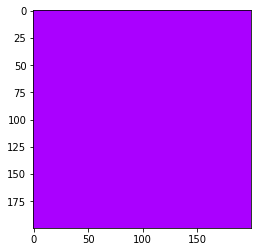

In [46]:
R.addHue(10)
G.addHue(10)
B.addHue(10)
print(R.val(),G.val(),B.val(),R.showHSV(),G.showHSV(),B.showHSV())
R.imshow()
G.imshow()
B.imshow()


In [ ]:
R.addHue(10)
G.addHue(10)
B.addHue(10)
print(R.val(),G.val(),B.val(),R.showHSV(),G.showHSV(),B.showHSV())


In [36]:
R.show()

In [31]:
cv2.destroyAllWindows()

In [257]:

u8 = np.uint8
print(a[0,0,:])

[255   0   0]


In [391]:
import random
rand = random.random

In [ ]:
def drawboox(msg):
    np.ones()
    

In [423]:
while 1:
    ind = int(rand()*180)
    a = R.img
    a= cv2.cvtColor(u8(a),cv2.COLOR_RGB2HSV)
    a[:,:,0] = a[:,:,0] + ind
    print(a[0,0,:])
    a = cv2.cvtColor(u8(a),cv2.COLOR_HSV2RGB)
    cv2.imshow('a',a)
    if cv2.waitKey(60) == ord('q'):
        cv2.destroyAllWindows()
        break
        

[ 39 255 255]
[ 99 255 255]
[110 255 255]
[ 49 255 255]
[153 255 255]
[174 255 255]
[149 255 255]
[ 92 255 255]
[ 17 255 255]
[ 93 255 255]
[ 17 255 255]
[105 255 255]
[113 255 255]
[ 34 255 255]
[ 25 255 255]
[101 255 255]
[ 65 255 255]
[105 255 255]
[ 17 255 255]
[ 31 255 255]
[173 255 255]
[ 10 255 255]
[138 255 255]
[  1 255 255]
[119 255 255]
[  0 255 255]
[109 255 255]
[160 255 255]
[ 78 255 255]
[160 255 255]
[ 47 255 255]
[161 255 255]
[167 255 255]
[163 255 255]
[130 255 255]
[133 255 255]
[160 255 255]
[ 48 255 255]
[ 78 255 255]
[ 58 255 255]
[164 255 255]
[111 255 255]
[135 255 255]
[ 20 255 255]
[ 22 255 255]
[ 71 255 255]
[159 255 255]
[ 20 255 255]
[ 91 255 255]
[  0 255 255]
[  0 255 255]
[ 93 255 255]
[ 15 255 255]
[125 255 255]
[  6 255 255]
[ 67 255 255]
[  2 255 255]
[164 255 255]
[132 255 255]
[ 55 255 255]
[ 38 255 255]
[  1 255 255]
[ 16 255 255]
[ 76 255 255]
[ 84 255 255]
[113 255 255]
[147 255 255]
[156 255 255]
[ 93 255 255]
[ 47 255 255]
[117 255 255]
[ 78 2

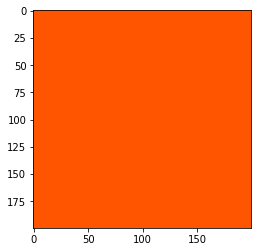

In [179]:
plt.imshow(R.img)